switch to the gpu machine

# Somali Automatic Speech Recognition (ASR) from ElevenLabs

### Why?  
A fine-tuned version of Whisper for the Somali language does not yet provide sufficiently accurate results. However, the startup Eleven Labs claims that their AI transcription tool, Scribe, outperforms Google Gemini and OpenAI's Whisper, achieving a word error rate of just 45.9% on the FLEURS benchmark.

You can explore more details about their platform [here](https://elevenlabs.io/pl/speech-to-text/somali).. Additionally, there is the possibility to use their demo for free by uploading a file through their interface below, which I will use via the API.

### Solution
We are switching to AI transcription tool, called **Scribe** [docs](https://elevenlabs.io/docs/capabilities/speech-to-text)

➡️ **Model:** `Scribe v1`  
➡️ **Benefit:** Ensures accurate Somali transcription in comparison to other models

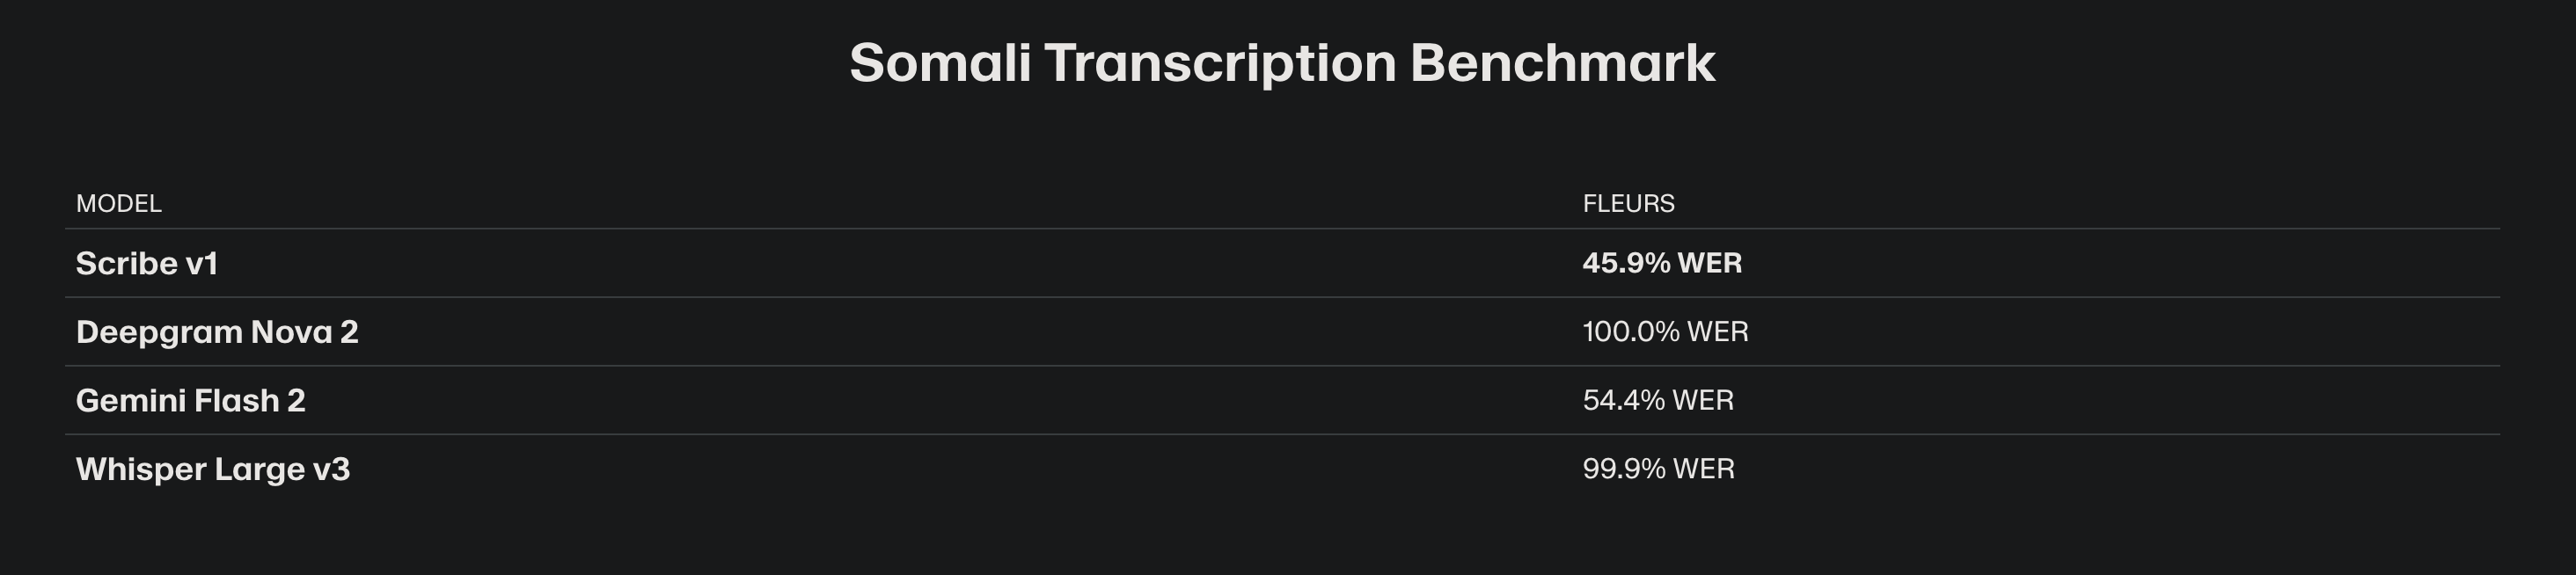
[source: ElevenLabs](https://elevenlabs.io/pl/speech-to-text/somali)

### Reference  
📄 [Eleven Labs - Free Somali Speech to Text Transcription](https://elevenlabs.io/pl/speech-to-text/somali)


code based on docs https://elevenlabs.io/docs/cookbooks/speech-to-text/synchronous

In [1]:
from dotenv import load_dotenv
from io import BytesIO
import requests
from elevenlabs.client import ElevenLabs
import os

load_dotenv()

client = ElevenLabs(
    api_key=os.getenv("ELEVENLABS_API_KEY"),
)

# Local file path instead of URL
audio_file_path = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/soundcloud_2022-07-01_to_2022-12-31/IDAACADDA 01-AUG-2022.mp3"

# Open and read the local file
with open(audio_file_path, "rb") as f:
    audio_data = BytesIO(f.read())

transcription = client.speech_to_text.convert(
    file=audio_data,
    model_id="scribe_v1",  # Model to use, for now only "scribe_v1" is supported
    # tag_audio_events=True,  # Tag audio events like laughter, applause, etc.
    # language_code="eng",    # Language of the audio file. If set to None, the model will detect the language automatically.
    # diarize=True,           # Whether to annotate who is speaking
)

ApiError: status_code: 401, body: {'detail': {'status': 'quota_exceeded', 'message': 'This request exceeds your quota of 10000. You have 133 credits remaining, while 3938 credits are required for this request.'}}

In [14]:
transcription.text

"(Music) Halkani waa Raadiyaha Ergo ee codka arrimaha bini'aadamnimada oo fadhigii suu yahay magaalada Nairobi ee dalka Kenya. Waxaad naga dhageysan yahay in saan muujada gaaban ee darrakeedu yahay koy laba aatanka mitirbaan una dhigan taas todobed iyo tobomkun sideed boqol shan iyo afartan magahartis. Saacadda geeska Afrika barimarka ay tahay saddexda ilaa afarta galabnimo. Waxaad sidoo kale naga dhageysan yahay in saan qaar ka tirsan idaacada dalka iyo barta in ku leenahay intarnetka ee fadhigiisu yahay Radio Ergo dhaw ta waad jii. (music) Kulanti wacan dhegisteeyaan waa Isniin 1da bisha Ogoosto sanadka labada kun labi iyo labaatanka. Qodobbada aad ku maqli doontaan idaacadda maanta oo aan idiin lasoo codsinaayo anigoo ah Ahmed Maxamed. Wuxuu ka mid ah daawayn bilaash ah oo loo sameynayo dadka ay abaartu saameysay ee ku nool degmada isku shuban ee gobolka Bari. Boqolaal qoys oo ay saameyeen culada jira qaybo ka mid ah gobolka Bakool oo durufa ay ku heestaan deegaanadii ay u barakacee

In [8]:
# Create the directory if it doesn't exist
import os
directory = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/transcriptions_soundcloud_2022-07-01_to_2022-12-31"
os.makedirs(directory, exist_ok=True)

# Save the contents of transcription.text to a file
with open("/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/transcriptions_soundcloud_2022-07-01_to_2022-12-31/IDAACADDA 01-AUG-2022.txt", "w") as file:
    file.write(transcription.text)

print("Successfully saved transcription.text to file.")

Successfully saved transcription.text to file.


jedno nagranie okolo godzinne okolo 4k kredytow 

duzo 100k hmm 

poszukiwanie alternatywy 

czyli dla tego eksperymentu potrzbowalbym ile ?

4k * 5 msc * 30 dni = 600 k 

gemini flash 2.0 

In [33]:
transcript

"Halkan wa raadiyaha Ergo ee qadka arimaha bina adanimada oo fadhigeedu yahay magalada Nairobi ee dalka Kenya, waxad naga dhagaysanaysan mujada gaban ee dhererkeedu yahay kow iyo labaatanka mitirbaana uga dhiganta kooy labaatan kun shan boqol shan iyo sagaashan mega hertz, saacada geeska afrika bari marka ay tahay sadexda ilaa afarta galabnimo\nwaxaad sidoo kale naga dhagaysanaysan qaarka tirsan idacadaha dalka iyo barta aynu ku leenahay internetka ee fadhigeedu yahay RadioErgo.Org\nKulanti wanaagsan dhagaystayal waa isniin ay bisha juun ay tahay kow sadadkoo sanadka waa laba kun afar iyo labatan ku soo dhawaada idacada Ergo ee Maanta anigoo ah Fadumo Ibrahim Aden ayaa idiin soo jeedinaya qodobada aad ku dhagaysan doontaa waxa ka mid ah caruurka soo jeeda qoysas dan yar ah oo wax ka barta iskulada hargeysa oo ka fa'iidaysanaya daryeel caafimaad oo bilaasha, hoola dhaqato ay danyeero ku dirirayaan miiga tuulada Calay macase oo ka tirsan degmada godob jiraan ee gobolka nugaal markii uu k

In [5]:
import os
import glob
from typing import Optional, List, Dict
from dotenv import load_dotenv
from google import genai
from google.genai import types
from datetime import datetime
import json
import time

# Load environment variables
load_dotenv(dotenv_path="/teamspace/studios/this_studio/.env")

def transcribe_audio(
    file_path: str,
    model: str = "gemini-2.0-flash"
) -> Optional[str]:
    """
    Uploads an audio file and generates a transcript.
    
    Args:
        file_path (str): Path to the audio (.mp3) file.
        model (str, optional): The Gemini model to use. Defaults to 'gemini-2.0-flash'.
        
    Returns:
        Optional[str]: The transcript text if successful, otherwise None.
        
    Raises:
        FileNotFoundError: If the specified audio file does not exist.
        ValueError: If the API response is invalid.
    """
    api_key = os.getenv("GEMINI_API_KEY")
    if not api_key:
        raise EnvironmentError("GEMINI_API_KEY not found in environment variables.")
    
    # Initialize Gemini client
    client = genai.Client(api_key=api_key)
    
    # Read audio file bytes
    try:
        with open(file_path, "rb") as f:
            audio_bytes = f.read()
    except FileNotFoundError as e:
        raise FileNotFoundError(f"Audio file not found: {file_path}") from e
    except Exception as e:
        raise RuntimeError(f"Failed to read file: {e}") from e
    
    # Create a Part with correct MIME type
    audio_part = types.Part.from_bytes(
        data=audio_bytes,
        mime_type="audio/mp3"
    )
    
    # Create prompt
    prompt = "Generate a transcript of the speech."
    
    # Request transcript
    try:
        response = client.models.generate_content(
            model=model,
            contents=[prompt, audio_part]
        )
    except Exception as e:
        raise RuntimeError(f"Failed to generate content: {e}") from e
    
    # Return the transcript
    if hasattr(response, 'text'):
        return response.text
    else:
        raise ValueError("No transcript text found in the response.")

def process_all_mp3_files(
    input_dir: str,
    output_dir: str,
    model: str = "gemini-2.0-flash",
    retry_count: int = 3,
    delay_between_failures: int = 10
) -> Dict[str, str]:
    """
    Process all MP3 files in the given directory and save transcripts to the output directory.
    
    Args:
        input_dir (str): Directory containing MP3 files to transcribe
        output_dir (str): Directory to save transcription files
        model (str): Gemini model to use for transcription
        retry_count (int): Number of times to retry failed transcriptions
        delay_between_failures (int): Seconds to wait between retry attempts
        
    Returns:
        Dict[str, str]: Dictionary mapping filenames to their transcription status
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get all MP3 files in the input directory
    mp3_files = glob.glob(os.path.join(input_dir, "*.mp3"))
    
    results = {}
    for mp3_file in mp3_files:
        filename = os.path.basename(mp3_file)
        base_filename = os.path.splitext(filename)[0]
        output_file = os.path.join(output_dir, f"{base_filename}.txt")
        
        # Skip if already transcribed
        if os.path.exists(output_file):
            print(f"Skipping {filename} - already transcribed")
            results[filename] = "skipped"
            continue
        
        print(f"Processing {filename}...")
        
        # Try transcription with retries
        for attempt in range(retry_count):
            try:
                transcript = transcribe_audio(mp3_file, model)
                
                # Save the transcript
                with open(output_file, "w", encoding="utf-8") as f:
                    f.write(transcript)
                
                print(f"Successfully transcribed {filename}")
                results[filename] = "success"
                break
                
            except Exception as e:
                print(f"Attempt {attempt+1}/{retry_count} failed for {filename}: {str(e)}")
                if attempt < retry_count - 1:
                    print(f"Waiting {delay_between_failures} seconds before retrying...")
                    time.sleep(delay_between_failures)
                else:
                    print(f"All attempts failed for {filename}")
                    results[filename] = f"failed: {str(e)}"
                    
                    # Log failures to a separate file
                    with open(os.path.join(output_dir, "failed_transcriptions.json"), "a") as f:
                        failure_info = {
                            "filename": filename,
                            "path": mp3_file,
                            "timestamp": datetime.now().isoformat(),
                            "error": str(e)
                        }
                        f.write(json.dumps(failure_info) + "\n")
    
    return results

# Directories
INPUT_DIR = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/soundcloud_2024-07-01_to_2024-09-30/"
OUTPUT_DIR = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/transcription_soundcloud_2024-07-01_to_2024-09-30/"

# Process all MP3 files
results = process_all_mp3_files(
    input_dir=INPUT_DIR,
    output_dir=OUTPUT_DIR
)

# Print summary
total_files = len(results)
successful = sum(1 for status in results.values() if status == "success")
skipped = sum(1 for status in results.values() if status == "skipped")
failed = total_files - successful - skipped

print("\n=== Transcription Summary ===")
print(f"Total MP3 files: {total_files}")
print(f"Successfully transcribed: {successful}")
print(f"Skipped (already transcribed): {skipped}")
print(f"Failed: {failed}")

# Example of running a single file for testing
def test_single_file():
    AUDIO_FILE_PATH = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/soundcloud_2024-07-01_to_2024-09-30/IDAACADDA 01-JUL-2024.mp3"
    try:
        transcript = transcribe_audio(file_path=AUDIO_FILE_PATH)
        print("\n--- Transcript ---\n")
        print(transcript)
    except Exception as e:
        print(f"Error: {e}")

# Uncomment to test a single file
# test_single_file()

Processing IDAACADDA 01-AUG-2024.mp3...
Successfully transcribed IDAACADDA 01-AUG-2024.mp3
Processing IDAACADDA 01-JUL-2024.mp3...
Successfully transcribed IDAACADDA 01-JUL-2024.mp3
Processing IDAACADDA 01-SEP-2024.mp3...
Successfully transcribed IDAACADDA 01-SEP-2024.mp3
Processing IDAACADDA 02-AUG-2024.mp3...
Successfully transcribed IDAACADDA 02-AUG-2024.mp3
Processing IDAACADDA 02-JUL-2024.mp3...
Successfully transcribed IDAACADDA 02-JUL-2024.mp3
Processing IDAACADDA 02-SEP-2024.mp3...
Successfully transcribed IDAACADDA 02-SEP-2024.mp3
Processing IDAACADDA 03-AUG-2024.mp3...
Successfully transcribed IDAACADDA 03-AUG-2024.mp3
Processing IDAACADDA 03-JUL-2024.mp3...
Successfully transcribed IDAACADDA 03-JUL-2024.mp3
Processing IDAACADDA 03-SEP-2023.mp3...
Successfully transcribed IDAACADDA 03-SEP-2023.mp3
Processing IDAACADDA 04-AUG-2022.mp3...
Successfully transcribed IDAACADDA 04-AUG-2022.mp3
Processing IDAACADDA 04-SEP-2024.mp3...
Successfully transcribed IDAACADDA 04-SEP-2024.mp3

In [7]:
import os
import glob
from typing import Optional, List, Dict
from dotenv import load_dotenv
from google import genai
from google.genai import types
from datetime import datetime
import json
import time

# Load environment variables
load_dotenv(dotenv_path="/teamspace/studios/this_studio/.env")

def translate_text(
    text: str,
    source_language: str = "Somali",
    target_language: str = "English",
    model: str = "gemini-2.0-flash"
) -> Optional[str]:
    """
    Translates text from source language to target language using Gemini.
    
    Args:
        text (str): The text to translate.
        source_language (str): The source language. Defaults to 'Somali'.
        target_language (str): The target language. Defaults to 'English'.
        model (str): The Gemini model to use. Defaults to 'gemini-2.0-flash'.
        
    Returns:
        Optional[str]: The translated text if successful, otherwise None.
        
    Raises:
        ValueError: If the API response is invalid.
    """
    api_key = os.getenv("GEMINI_API_KEY")
    if not api_key:
        raise EnvironmentError("GEMINI_API_KEY not found in environment variables.")
    
    # Initialize Gemini client
    client = genai.Client(api_key=api_key)
    
    # Create prompt
    prompt = f"Translate the following {source_language} text to {target_language}:\n\n{text}"
    
    # Request translation
    try:
        response = client.models.generate_content(
            model=model,
            contents=[prompt]
        )
    except Exception as e:
        raise RuntimeError(f"Failed to generate translation: {e}") from e
    
    # Return the translation
    if hasattr(response, 'text'):
        return response.text
    else:
        raise ValueError("No translation text found in the response.")

def process_all_transcription_files(
    input_dir: str,
    output_dir: str,
    source_language: str = "Somali",
    target_language: str = "English",
    model: str = "gemini-2.0-flash",
    retry_count: int = 3,
    delay_between_failures: int = 10
) -> Dict[str, str]:
    """
    Process all transcription files in the given directory and save translations to the output directory.
    
    Args:
        input_dir (str): Directory containing transcription files to translate
        output_dir (str): Directory to save translation files
        source_language (str): Source language of the transcriptions
        target_language (str): Target language for translations
        model (str): Gemini model to use for translation
        retry_count (int): Number of times to retry failed translations
        delay_between_failures (int): Seconds to wait between retry attempts
        
    Returns:
        Dict[str, str]: Dictionary mapping filenames to their translation status
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get all text files in the input directory
    text_files = glob.glob(os.path.join(input_dir, "*.txt"))
    
    results = {}
    for text_file in text_files:
        filename = os.path.basename(text_file)
        output_file = os.path.join(output_dir, filename)
        
        # Skip if already translated
        if os.path.exists(output_file):
            print(f"Skipping {filename} - already translated")
            results[filename] = "skipped"
            continue
        
        print(f"Processing {filename}...")
        
        try:
            # Read the transcription
            with open(text_file, "r", encoding="utf-8") as f:
                transcription = f.read().strip()
            
            if not transcription:
                print(f"Skipping {filename} - empty transcription")
                results[filename] = "skipped (empty)"
                continue
        except Exception as e:
            print(f"Error reading {filename}: {str(e)}")
            results[filename] = f"failed: {str(e)}"
            continue
        
        # Try translation with retries
        for attempt in range(retry_count):
            try:
                translation = translate_text(
                    text=transcription,
                    source_language=source_language,
                    target_language=target_language,
                    model=model
                )
                
                # Save the translation
                with open(output_file, "w", encoding="utf-8") as f:
                    f.write(translation)
                
                print(f"Successfully translated {filename}")
                results[filename] = "success"
                break
                
            except Exception as e:
                print(f"Attempt {attempt+1}/{retry_count} failed for {filename}: {str(e)}")
                if attempt < retry_count - 1:
                    print(f"Waiting {delay_between_failures} seconds before retrying...")
                    time.sleep(delay_between_failures)
                else:
                    print(f"All attempts failed for {filename}")
                    results[filename] = f"failed: {str(e)}"
                    
                    # Log failures to a separate file
                    with open(os.path.join(output_dir, "failed_translations.json"), "a") as f:
                        failure_info = {
                            "filename": filename,
                            "path": text_file,
                            "timestamp": datetime.now().isoformat(),
                            "error": str(e)
                        }
                        f.write(json.dumps(failure_info) + "\n")
    
    return results

# Directories
INPUT_DIR = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/1_phase/data/transcription_soundcloud_2024-07-01_to_2024-09-30/"
OUTPUT_DIR = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/1_phase/data/english_transcription_soundcloud_2024-07-01_to_2024-09-30/"

# Process all transcription files
results = process_all_transcription_files(
    input_dir=INPUT_DIR,
    output_dir=OUTPUT_DIR
)

# Print summary
total_files = len(results)
successful = sum(1 for status in results.values() if status == "success")
skipped = sum(1 for status in results.values() if status == "skipped" or status == "skipped (empty)")
failed = total_files - successful - skipped

print("\n=== Translation Summary ===")
print(f"Total transcription files: {total_files}")
print(f"Successfully translated: {successful}")
print(f"Skipped (already translated or empty): {skipped}")
print(f"Failed: {failed}")

# Example of translating a single file for testing
def test_single_file(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            transcription = f.read().strip()
            
        translation = translate_text(text=transcription)
        print("\n--- Original Text ---\n")
        print(transcription[:500] + "..." if len(transcription) > 500 else transcription)
        print("\n--- Translation ---\n")
        print(translation[:500] + "..." if len(translation) > 500 else translation)
    except Exception as e:
        print(f"Error: {e}")

# Example usage of test_single_file function:
# test_single_file("/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/transcription_soundcloud_2024-07-01_to_2024-09-30/IDAACADDA 01-JUL-2024.txt")

Processing IDAACADDA 01-AUG-2024.txt...


Successfully translated IDAACADDA 01-AUG-2024.txt
Processing IDAACADDA 01-JUL-2024.txt...
Successfully translated IDAACADDA 01-JUL-2024.txt
Processing IDAACADDA 01-SEP-2024.txt...
Successfully translated IDAACADDA 01-SEP-2024.txt
Processing IDAACADDA 02-AUG-2024.txt...
Successfully translated IDAACADDA 02-AUG-2024.txt
Processing IDAACADDA 02-JUL-2024.txt...
Successfully translated IDAACADDA 02-JUL-2024.txt
Processing IDAACADDA 02-SEP-2024.txt...
Successfully translated IDAACADDA 02-SEP-2024.txt
Processing IDAACADDA 03-AUG-2024.txt...
Successfully translated IDAACADDA 03-AUG-2024.txt
Processing IDAACADDA 03-JUL-2024.txt...
Successfully translated IDAACADDA 03-JUL-2024.txt
Processing IDAACADDA 03-SEP-2023.txt...
Successfully translated IDAACADDA 03-SEP-2023.txt
Processing IDAACADDA 04-AUG-2022.txt...
Successfully translated IDAACADDA 04-AUG-2022.txt
Processing IDAACADDA 04-SEP-2024.txt...
Successfully translated IDAACADDA 04-SEP-2024.txt
Processing IDAACADDA 05-AUG-2024.txt...
Successful